<a href="https://colab.research.google.com/github/sanmayphy/course-v3/blob/master/AlternateHW5Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/benedekrozemberczki/GAM/archive/master.zip

--2019-05-19 20:52:52--  https://github.com/benedekrozemberczki/GAM/archive/master.zip
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/benedekrozemberczki/GAM/zip/master [following]
--2019-05-19 20:52:52--  https://codeload.github.com/benedekrozemberczki/GAM/zip/master
Resolving codeload.github.com (codeload.github.com)... 192.30.253.120
Connecting to codeload.github.com (codeload.github.com)|192.30.253.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [ <=>                ]   2.55M  16.7MB/s    in 0.2s    

2019-05-19 20:52:53 (16.7 MB/s) - ‘master.zip’ saved [2672177]



### The dataset description is given at : https://github.com/benedekrozemberczki/GAM/

In [2]:
pip install dgl

     |████████████████████████████████| 747kB 2.8MB/s 


In [0]:
import networkx as nx
import dgl
import numpy as np

In [4]:
!unzip master.zip 

Archive:  master.zip
d21d8cf11ac3169bb8bb8023b62eaec4126c888e
   creating: GAM-master/
  inflating: GAM-master/LICENSE      
  inflating: GAM-master/README.md    
  inflating: GAM-master/attention_true.jpg  
  inflating: GAM-master/gam_running.jpg  
   creating: GAM-master/input/
   creating: GAM-master/input/test/
  inflating: GAM-master/input/test/1.json  
  inflating: GAM-master/input/test/10.json  
  inflating: GAM-master/input/test/11.json  
  inflating: GAM-master/input/test/12.json  
  inflating: GAM-master/input/test/13.json  
  inflating: GAM-master/input/test/14.json  
  inflating: GAM-master/input/test/15.json  
  inflating: GAM-master/input/test/16.json  
  inflating: GAM-master/input/test/17.json  
  inflating: GAM-master/input/test/18.json  
  inflating: GAM-master/input/test/19.json  
  inflating: GAM-master/input/test/2.json  
  inflating: GAM-master/input/test/20.json  
  inflating: GAM-master/input/test/21.json  
  inflating: GAM-master/input/test/22.json  
  inflatin

In [5]:
!ls -a GAM-master/

.   attention_true.jpg	input	 logs	 paper.pdf  src
..  gam_running.jpg	LICENSE  output  README.md


In [6]:
!cat GAM-master/input/train/4.json

{"target": 0, "edges": [[0, 15], [0, 21], [0, 28], [0, 33], [0, 41], [0, 46], [0, 50], [0, 53], [0, 63], [0, 72], [0, 83], [0, 94], [1, 17], [1, 33], [1, 49], [1, 57], [1, 63], [1, 70], [1, 77], [1, 81], [1, 87], [2, 19], [2, 30], [2, 35], [2, 37], [2, 41], [2, 89], [2, 95], [2, 96], [3, 12], [3, 32], [3, 33], [3, 40], [3, 64], [3, 89], [4, 5], [4, 27], [4, 33], [4, 41], [4, 43], [4, 65], [4, 66], [4, 72], [4, 85], [4, 86], [4, 98], [5, 7], [5, 10], [5, 12], [5, 38], [5, 46], [5, 59], [5, 67], [5, 99], [6, 16], [6, 18], [6, 19], [6, 43], [6, 54], [6, 70], [6, 91], [6, 94], [7, 9], [7, 15], [7, 38], [7, 40], [7, 51], [7, 62], [7, 66], [8, 30], [8, 53], [8, 66], [8, 77], [8, 81], [8, 92], [8, 93], [8, 99], [9, 16], [9, 19], [9, 25], [9, 40], [9, 54], [9, 74], [9, 79], [9, 90], [10, 11], [10, 16], [10, 20], [10, 29], [10, 30], [10, 53], [10, 79], [11, 31], [11, 33], [11, 37], [11, 46], [11, 63], [11, 74], [12, 36], [12, 55], [12, 94], [13, 16], [14, 33], [14, 45], [14, 51], [14, 53], [14,

In [0]:
import numpy as np

In [0]:
import json
import glob

In [0]:
with open('GAM-master/input/train/4.json') as json_file:
  data = json.load(json_file)

In [10]:
ls GAM-master/input/train/*.json

GAM-master/input/train/10.json  GAM-master/input/train/33.json
GAM-master/input/train/11.json  GAM-master/input/train/34.json
GAM-master/input/train/12.json  GAM-master/input/train/35.json
GAM-master/input/train/13.json  GAM-master/input/train/36.json
GAM-master/input/train/14.json  GAM-master/input/train/37.json
GAM-master/input/train/15.json  GAM-master/input/train/38.json
GAM-master/input/train/16.json  GAM-master/input/train/39.json
GAM-master/input/train/17.json  GAM-master/input/train/3.json
GAM-master/input/train/18.json  GAM-master/input/train/40.json
GAM-master/input/train/19.json  GAM-master/input/train/41.json
GAM-master/input/train/1.json   GAM-master/input/train/42.json
GAM-master/input/train/20.json  GAM-master/input/train/43.json
GAM-master/input/train/21.json  GAM-master/input/train/44.json
GAM-master/input/train/22.json  GAM-master/input/train/45.json
GAM-master/input/train/23.json  GAM-master/input/train/46.json
GAM-master/input/train/24.json  GAM-master/input/train/4

In [11]:
ls -a GAM-master/input

./  ../  test/  train/


In [0]:
train_list, test_list = glob.glob('GAM-master/input/train/*.json'), glob.glob('GAM-master/input/test/*.json')

In [13]:
train_list

['GAM-master/input/train/13.json',
 'GAM-master/input/train/2.json',
 'GAM-master/input/train/32.json',
 'GAM-master/input/train/10.json',
 'GAM-master/input/train/23.json',
 'GAM-master/input/train/3.json',
 'GAM-master/input/train/25.json',
 'GAM-master/input/train/34.json',
 'GAM-master/input/train/17.json',
 'GAM-master/input/train/21.json',
 'GAM-master/input/train/27.json',
 'GAM-master/input/train/28.json',
 'GAM-master/input/train/5.json',
 'GAM-master/input/train/29.json',
 'GAM-master/input/train/48.json',
 'GAM-master/input/train/41.json',
 'GAM-master/input/train/31.json',
 'GAM-master/input/train/37.json',
 'GAM-master/input/train/30.json',
 'GAM-master/input/train/50.json',
 'GAM-master/input/train/19.json',
 'GAM-master/input/train/11.json',
 'GAM-master/input/train/45.json',
 'GAM-master/input/train/8.json',
 'GAM-master/input/train/15.json',
 'GAM-master/input/train/16.json',
 'GAM-master/input/train/39.json',
 'GAM-master/input/train/43.json',
 'GAM-master/input/train

In [14]:
data.keys()

dict_keys(['target', 'edges', 'labels', 'inverse_labels'])

In [0]:
def GraphFromJson(json_name) : 
  
  with open(json_name) as json_file:
     data = json.load(json_file)
  
  n_nodes = len(data['labels'])
  
  g = dgl.DGLGraph()
  g.add_nodes(n_nodes)
  
  
  for iedge in data['edges'] :
    
     g.add_edge(iedge[0], iedge[1])
  
  
  label = data['target']
  
  return (g, label)
  
  

In [16]:
len(data['labels'])

100

In [0]:
g, label = GraphFromJson('GAM-master/input/train/21.json')

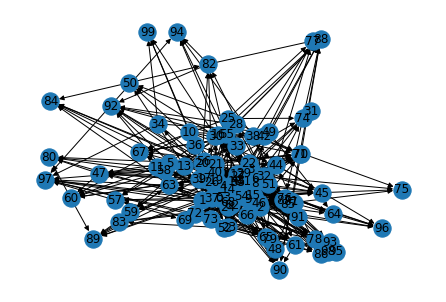

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
nx.draw(g.to_networkx(), with_labels=True)
plt.show()

In [19]:
label

0

In [0]:
train_gr_set, train_gr_label, test_gr_set, test_gr_label = [], [], [], []

for ilist in train_list : 
  
    g, label = GraphFromJson(ilist)
    
    train_gr_set.append( (g,label)  )
    train_gr_label.append(label)
    
    
for ilist in test_list : 
  
    g, label = GraphFromJson(ilist)
    
    test_gr_set.append(  (g,label) )
    test_gr_label.append(label)

In [21]:
len(test_gr_set)

50

In [22]:
np.unique(test_gr_label)

array([0, 1, 2])

In [0]:
n_class = len( np.unique(train_gr_label)  )

In [24]:
np.where( np.array(train_gr_label) == 0  ), np.where( np.array(train_gr_label) == 1  ), np.where( np.array(train_gr_label) == 2  )

((array([ 0,  9, 12, 13, 20, 22, 23, 24, 29, 30, 31, 33, 37, 39, 40, 41, 44,
         48]),),
 (array([ 1,  2,  3,  5, 11, 16, 17, 21, 25, 27, 32, 35, 42, 43, 47, 49]),),
 (array([ 4,  6,  7,  8, 10, 14, 15, 18, 19, 26, 28, 34, 36, 38, 45, 46]),))

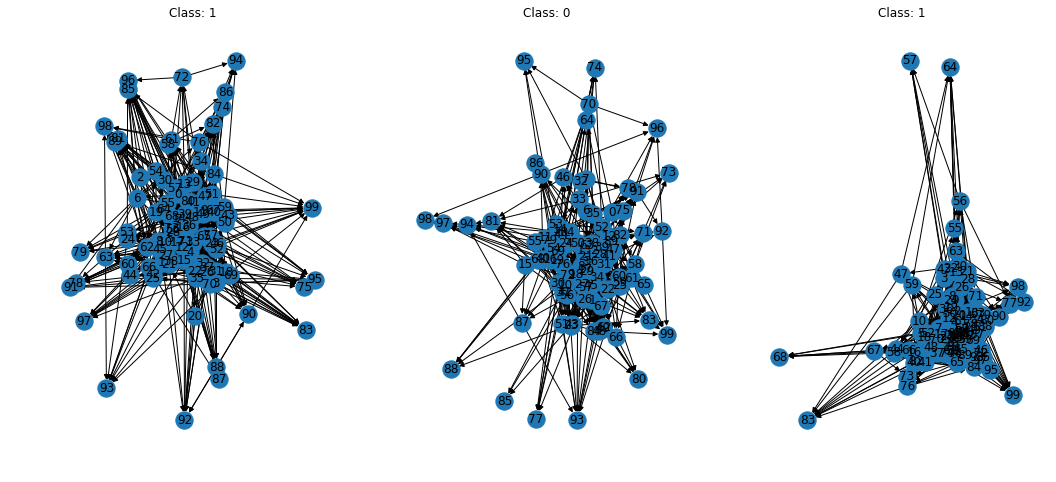

In [25]:
plt.rcParams["figure.figsize"]=18, 8
fig, axes = plt.subplots(nrows=1, ncols=3)

iter = 0

List = [1, 0, 5]

for ax in axes.flatten() : 
    
    graph, label = train_gr_set[ List[iter] ][0], train_gr_set[ List[iter] ][1]
    
    nx.draw(graph.to_networkx(), with_labels=True, ax=ax)
    
    ax.set_title('Class: {:d}'.format(label)  )
    
    iter += 1
  
plt.show()

In [0]:
x = map(list, zip(train_gr_set))

In [0]:
def collate(samples):
    # The input `samples` is a list of pairs
    #  (graph, label).
    graphs, labels = map(list, zip(*samples))
    batched_graph = dgl.batch(graphs) # --- the batch function creates the minibatch out of sparse graphs --- #
    return batched_graph, torch.tensor(labels)

In [0]:
import dgl.function as fn
import torch
import torch.nn as nn


# Sends a message of node feature h.
msg = fn.copy_src(src='h', out='m')

def reduce(nodes):
    """Take an average over all neighbor node features hu and use it to
    overwrite the original node feature."""
    accum = torch.mean(nodes.mailbox['m'], 1)
    return {'h': accum}

class NodeApplyModule(nn.Module):
    """Update the node feature hv with ReLU(Whv+b)."""
    def __init__(self, in_feats, out_feats, activation):
        super(NodeApplyModule, self).__init__()
        self.linear = nn.Linear(in_feats, out_feats)
        self.activation = activation

    def forward(self, node):
        h = self.linear(node.data['h'])
        h = self.activation(h)
        return {'h' : h}

class GN_block(nn.Module):
    def __init__(self, in_feats, out_feats, activation):
        super(GN_block, self).__init__()
        self.apply_mod = NodeApplyModule(in_feats, out_feats, activation)

    def forward(self, g, feature):
        # Initialize the node features with h.
        g.ndata['h'] = feature
        g.update_all(msg, reduce)
        g.apply_nodes(func=self.apply_mod)
        return g.ndata.pop('h')

In [0]:
import torch.nn.functional as F


class Classifier1(nn.Module):
    def __init__(self, in_dim, hidden_dim, n_classes):
        super(Classifier1, self).__init__()

        self.layers = nn.ModuleList([
            GN_block(in_dim, hidden_dim, F.relu),
            GN_block(hidden_dim, hidden_dim, F.relu),
            GN_block(hidden_dim, hidden_dim, F.relu)])
        self.classify = nn.Linear(hidden_dim, n_classes)
        self.normal = nn.Softmax()

    def forward(self, g):
        # For undirected graphs, in_degree is the same as
        # out_degree.
        h = g.in_degrees().view(-1, 1).float()
        h = h.cuda() # --- converting to gpu ---- #
        
        for conv in self.layers:
            h = conv(g, h)
        g.ndata['h'] = h
        hg = dgl.mean_nodes(g, 'h')
        return  self.classify(hg) 
      
      
class Classifier2(nn.Module):
    def __init__(self, in_dim, hidden_dim, n_classes):
        super(Classifier2, self).__init__()

        self.layers = nn.ModuleList([
            GN_block(in_dim, hidden_dim, F.relu),
            GN_block(hidden_dim, hidden_dim, F.relu),
            GN_block(hidden_dim, hidden_dim, F.relu), 
            GN_block(hidden_dim, hidden_dim, F.relu)])
        self.classify = nn.Linear(hidden_dim, n_classes)
        self.normal = nn.Softmax()

    def forward(self, g):
        # For undirected graphs, in_degree is the same as
        # out_degree.
        h = g.in_degrees().view(-1, 1).float()
        h = h.cuda() # --- converting to gpu ---- #
        
        for conv in self.layers:
            h = conv(g, h)
        g.ndata['h'] = h
        hg = dgl.mean_nodes(g, 'h')
        return  self.classify(hg) 

In [0]:
import torch.optim as optim
from torch.utils.data import DataLoader

In [0]:
data_loader = DataLoader(train_gr_set, batch_size=5, shuffle=True,
                         collate_fn=collate)


test_data_loader = DataLoader(test_gr_set, batch_size=5, shuffle=True,
                         collate_fn=collate)

In [0]:
# Create model
model1 = Classifier1(1, 256, 3)
model2 = Classifier2(1, 256, 3)
#model = model.cuda()

if torch.cuda.is_available():
    model1 = model1.cuda()
    model2 = model2.cuda()


loss_func = nn.CrossEntropyLoss()
optimizer1 = optim.Adam(model1.parameters(), lr=0.001)
optimizer2 = optim.Adam(model2.parameters(), lr=0.001)

In [33]:
for bg, label in data_loader:
    print(label)

tensor([2, 1, 1, 0, 0])
tensor([0, 1, 2, 2, 0])
tensor([2, 2, 1, 2, 2])
tensor([2, 2, 2, 0, 1])
tensor([0, 1, 0, 1, 0])
tensor([1, 0, 1, 1, 2])
tensor([1, 0, 0, 2, 2])
tensor([1, 1, 0, 0, 0])
tensor([1, 0, 1, 1, 0])
tensor([2, 2, 0, 2, 0])


In [34]:

## --------- Run the training loop ------------------- ##
n_epoch = 1000

epoch_losses1, epoch_val_losses1 = [], []
epoch_losses2, epoch_val_losses2 = [], []

for epoch in range(1, n_epoch+1):
    epoch_loss1, epoch_loss2 = 0, 0
    iter_batch = 0
    model1.train()
    model2.train()
    for bg, label in data_loader:
            
        prediction1 = model1(bg)  
        loss1 = loss_func(prediction1, label.cuda() )
        optimizer1.zero_grad()
        loss1.backward()
        optimizer1.step()
        epoch_loss1 += loss1.detach().item()
        
        prediction2 = model2(bg)  
        loss2 = loss_func(prediction2, label.cuda() )
        optimizer2.zero_grad()
        loss2.backward()
        optimizer2.step()
        epoch_loss2 += loss2.detach().item()
        
        iter_batch += 1
    epoch_loss1 /= (iter_batch + 1)
    epoch_loss2 /= (iter_batch + 1)
    #print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
    epoch_losses1.append(epoch_loss1)
    epoch_losses2.append(epoch_loss2)
    
    
    epoch_val_loss1, epoch_val_loss2 = 0, 0
    iter_batch_val = 0
    model1.eval()
    model2.eval()
    for bg, label in test_data_loader:
            
        prediction1 = model1(bg)
        loss1 = loss_func(prediction1, label.cuda() )
        epoch_val_loss1 += loss1.detach().item()
        
        prediction2 = model2(bg)
        loss2 = loss_func(prediction2, label.cuda() )
        epoch_val_loss2 += loss2.detach().item()
        
        iter_batch_val += 1
    epoch_val_loss1 /= (iter_batch_val + 1)
    epoch_val_loss2 /= (iter_batch_val + 1)
    #print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
    epoch_val_losses1.append(epoch_val_loss1)
    epoch_val_losses2.append(epoch_val_loss2)
    
    print('Epoch {}, loss1 {:.4f}, loss2 {:.4f}, val_loss1 {:.4f}, val_loss2 {:.4f}'.format(epoch, epoch_loss1, epoch_loss2, epoch_val_loss1, epoch_val_loss2))

/usr/local/lib/python3.6/dist-packages/dgl/base.py:18: UserWarning: Initializer is not set. Use zero initializer instead. To suppress this warning, use `set_initializer` to explicitly specify which initializer to use.
  warnings.warn(msg)


Epoch 1, loss1 1.0132, loss2 1.0008, val_loss1 0.9935, val_loss2 0.9949
Epoch 2, loss1 1.0025, loss2 0.9984, val_loss1 0.9874, val_loss2 0.9882
Epoch 3, loss1 0.9976, loss2 0.9937, val_loss1 0.9899, val_loss2 0.9902
Epoch 4, loss1 0.9797, loss2 0.9851, val_loss1 0.9742, val_loss2 0.9800
Epoch 5, loss1 0.9624, loss2 0.9707, val_loss1 0.9593, val_loss2 0.9675
Epoch 6, loss1 0.9426, loss2 0.9569, val_loss1 0.9419, val_loss2 0.9550
Epoch 7, loss1 0.9176, loss2 0.9418, val_loss1 0.9142, val_loss2 0.9408
Epoch 8, loss1 0.8851, loss2 0.9179, val_loss1 0.8876, val_loss2 0.9261
Epoch 9, loss1 0.8454, loss2 0.8850, val_loss1 0.8783, val_loss2 0.9167
Epoch 10, loss1 0.8184, loss2 0.8617, val_loss1 0.8482, val_loss2 0.9005
Epoch 11, loss1 0.8153, loss2 0.8516, val_loss1 0.8800, val_loss2 0.9250
Epoch 12, loss1 0.7824, loss2 0.8324, val_loss1 0.8218, val_loss2 0.8878
Epoch 13, loss1 0.7791, loss2 0.8244, val_loss1 0.8296, val_loss2 0.8954
Epoch 14, loss1 0.8026, loss2 0.8393, val_loss1 0.8944, val_

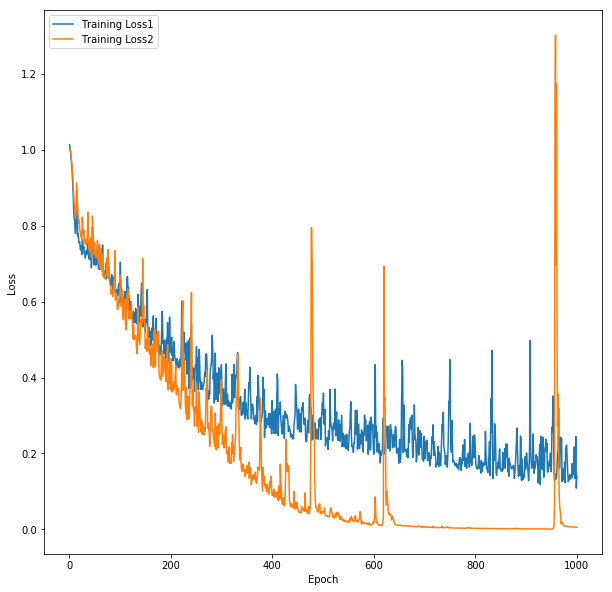

In [35]:
plt.rcParams["figure.figsize"]=10,10

plt.plot( range(1, n_epoch+1), np.array(epoch_losses1), label='Training Loss1' )
plt.plot( range(1, n_epoch+1), np.array(epoch_losses2), label='Training Loss2' )
# plt.plot( range(1, n_epoch+1), np.array(epoch_val_losses1), label='Validation Loss1' )
# plt.plot( range(1, n_epoch+1), np.array(epoch_val_losses2), label='Validation Loss2' )
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [36]:
model1.eval()
# Convert a list of tuples to two lists
test_X, test_Y = map(list, zip(*test_gr_set))
test_bg = dgl.batch(test_X)
test_Y = torch.tensor(test_Y).float().view(-1, 1)
probs_Y1 = torch.softmax(model1(test_bg), 1)
sampled_Y1 = torch.multinomial(probs_Y1.cpu() , 1)
argmax_Y1 = torch.max(probs_Y1.cpu(), 1)[1].view(-1, 1)
print('Accuracy of sampled predictions on the test set: {:.4f}%'.format(
    (test_Y == sampled_Y1.float()).sum().item() / len(test_Y) * 100))
# print('Accuracy of argmax predictions on the test set: {:4f}%'.format(
#     (test_Y == argmax_Y.float()).sum().item() / len(test_Y) * 100))

Accuracy of sampled predictions on the test set: 66.0000%


/usr/local/lib/python3.6/dist-packages/dgl/base.py:18: UserWarning: Initializer is not set. Use zero initializer instead. To suppress this warning, use `set_initializer` to explicitly specify which initializer to use.
  warnings.warn(msg)


In [37]:
np.where( sampled_Y1.cpu().numpy() == test_Y.cpu().numpy() )[0]

array([ 1,  2,  4,  6,  8,  9, 10, 11, 12, 13, 15, 16, 17, 19, 20, 21, 23,
       24, 27, 28, 29, 34, 35, 36, 38, 39, 41, 42, 43, 46, 47, 48, 49])

In [38]:
model2.eval()
# Convert a list of tuples to two lists
test_X, test_Y = map(list, zip(*test_gr_set))
test_bg = dgl.batch(test_X)
test_Y = torch.tensor(test_Y).float().view(-1, 1)
probs_Y2 = torch.softmax(model2(test_bg), 1)
sampled_Y2 = torch.multinomial(probs_Y2.cpu() , 1)
argmax_Y2 = torch.max(probs_Y2.cpu(), 1)[1].view(-1, 1)
print('Accuracy of sampled predictions on the test set: {:.4f}%'.format(
    (test_Y == sampled_Y2.float()).sum().item() / len(test_Y) * 100))

Accuracy of sampled predictions on the test set: 60.0000%


/usr/local/lib/python3.6/dist-packages/dgl/base.py:18: UserWarning: Initializer is not set. Use zero initializer instead. To suppress this warning, use `set_initializer` to explicitly specify which initializer to use.
  warnings.warn(msg)


In [39]:
np.where( sampled_Y2.cpu().numpy() == test_Y.cpu().numpy() )[0]

array([ 3,  6,  8,  9, 11, 12, 13, 14, 16, 19, 20, 21, 22, 23, 24, 26, 28,
       31, 32, 34, 35, 36, 37, 39, 41, 43, 44, 47, 48, 49])

### Well classified graph

In [0]:
g, label = GraphFromJson('GAM-master/input/test/10.json')

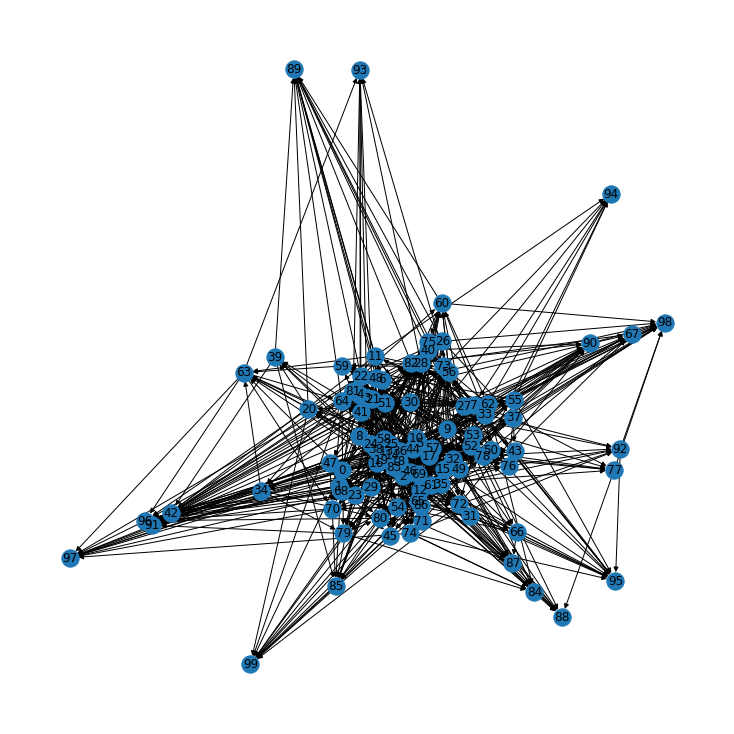

In [41]:
import networkx as nx
import matplotlib.pyplot as plt
nx.draw(g.to_networkx(), with_labels=True)
plt.show()

In [42]:
g.in_degrees()


tensor([ 0,  0,  1,  0,  0,  3,  0,  1,  2,  0,  1,  3,  1,  2,  0,  2,  3,  4,
         3,  1,  3,  3,  3,  2,  1,  5,  4,  2,  6,  3,  3,  3,  6,  5,  3,  3,
         2,  3,  3,  5,  5,  3,  8,  6,  6,  8,  4,  4,  6,  5,  8,  5,  6,  3,
         5,  4, 10,  7,  3,  5,  9,  7, 11,  9,  5,  9,  6,  8, 11, 10, 11,  8,
        10, 11,  9,  8,  7,  6,  8,  9, 14,  5, 11,  9,  9, 11,  7, 11,  9, 14,
        15, 20,  7,  8,  7, 15, 13, 12, 15, 13])

In [43]:
g.in_edges(2)

(tensor([0]), tensor([2]))

### Worse classified image

In [0]:
g, label = GraphFromJson('GAM-master/input/test/3.json')

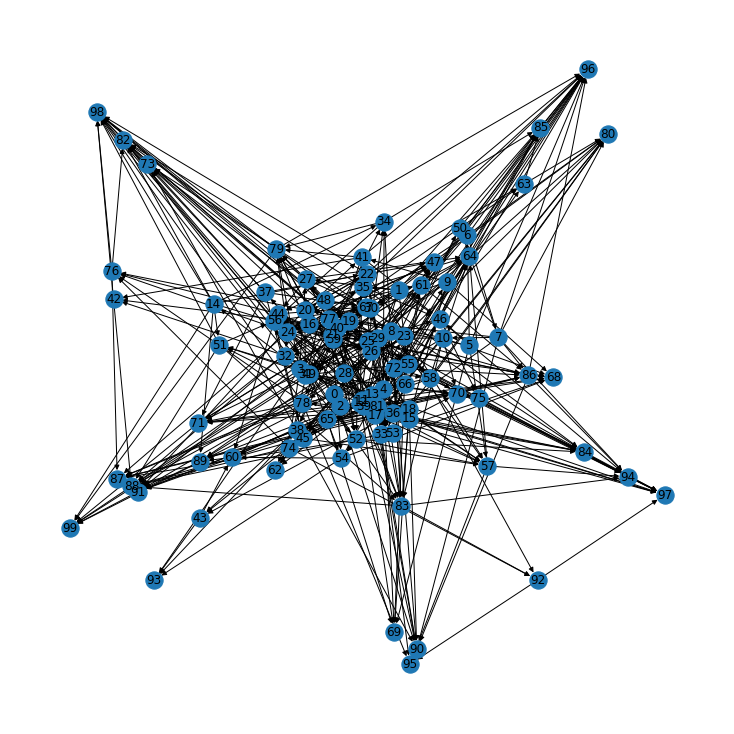

In [45]:
nx.draw(g.to_networkx(), with_labels=True)
plt.show()

In [46]:
g.in_degrees()

tensor([ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  0,  0,  0,  1,  1,  0,  0,
         0,  5,  2,  3,  4,  2,  3,  4,  3,  4,  1,  7,  4,  5,  5,  2,  5,  2,
         1,  1,  2,  4,  2,  5,  3,  3,  3,  3,  6,  7,  3,  4,  3,  4,  4,  4,
         4,  6, 10,  9,  2,  5,  5,  4,  4,  3,  9,  2,  4,  8,  7,  6,  5,  8,
         7,  6,  7,  3,  5, 10,  3,  9, 10,  7, 10, 10,  7,  7, 10,  7, 11,  5,
         9,  7,  3,  4,  8,  5, 16, 10, 14,  7])

In [47]:
test_list

['GAM-master/input/test/13.json',
 'GAM-master/input/test/2.json',
 'GAM-master/input/test/32.json',
 'GAM-master/input/test/10.json',
 'GAM-master/input/test/23.json',
 'GAM-master/input/test/3.json',
 'GAM-master/input/test/25.json',
 'GAM-master/input/test/34.json',
 'GAM-master/input/test/17.json',
 'GAM-master/input/test/21.json',
 'GAM-master/input/test/27.json',
 'GAM-master/input/test/28.json',
 'GAM-master/input/test/5.json',
 'GAM-master/input/test/29.json',
 'GAM-master/input/test/48.json',
 'GAM-master/input/test/41.json',
 'GAM-master/input/test/31.json',
 'GAM-master/input/test/37.json',
 'GAM-master/input/test/30.json',
 'GAM-master/input/test/50.json',
 'GAM-master/input/test/19.json',
 'GAM-master/input/test/11.json',
 'GAM-master/input/test/45.json',
 'GAM-master/input/test/8.json',
 'GAM-master/input/test/15.json',
 'GAM-master/input/test/16.json',
 'GAM-master/input/test/39.json',
 'GAM-master/input/test/43.json',
 'GAM-master/input/test/35.json',
 'GAM-master/input